## Exercise

#### 0. Set up the environment

- 0.1 Import the main data analysis libraries used so far
(Hint: pandas, numpy, matplotlib.pyplot and seaborn)

- 0.2 Give access to Colab to read Google Drive files
(Hint: Either manually (Folder icon) or running code)

```
from google.colab import drive
drive.mount('/content/drive')
```


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### 1. Read the dataset

File name is `player_base.xlsx` within datasets folder using `pd.read_excel()` function.

In [ ]:
path_data = '/content/drive/MyDrive/Python_for_ESADE/Session_3_Descriptive_statistics/datasets/player_base.xlsx'
df_player = pd.read_excel(path_data)

In [ ]:
df_player.head()

,playerid,platform,age,daysingame,companygamesplayed,gameroundsplayed,levelscompleted,moneyspent,region
0,P00001,iOS,34,104,2,113,92,4.95,US
1,P00002,iOS,28,129,3,164,8,0.74,US
2,P00003,Amazon,36,56,1,386,1,8.75,China
3,P00004,iOS,45,118,0,35,21,154.19,US
4,P00005,iOS,27,132,2,104,84,30.74,Europe


#### Create a histogram for moneyspent

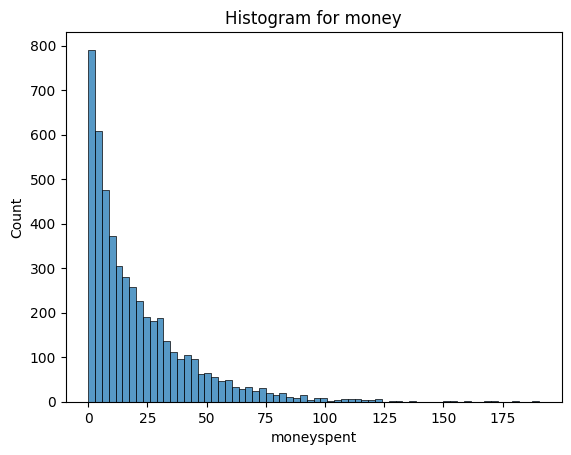

In [ ]:
# Histogram for levels completed
plt.figure()
plt.title('Histogram for money')
sns.histplot(df_player['moneyspent'])
plt.show()

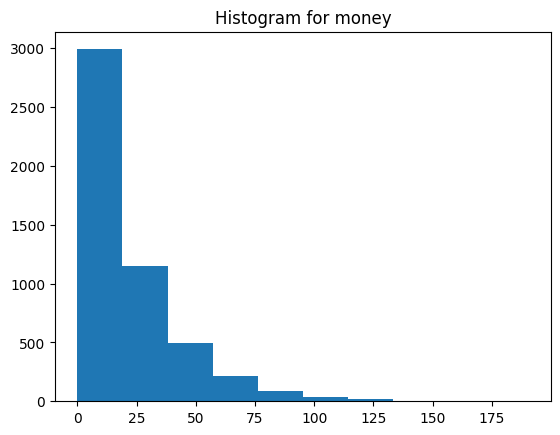

In [ ]:
plt.figure()
plt.title('Histogram for money')
plt.hist(df_player['moneyspent'])
plt.show()

#### 📊 Count the Number of Players per Region

In this exercise, we want to find out **how many players come from each region** and visualize the result using a bar chart.

You can approach this in **two different ways**:

<br>
 ✅ Option 1: Use Seaborn’s `countplot()`

This is the quickest way to plot the **frequency of each category** in a column.  
It automatically counts how many players belong to each region and plots a bar for each.

    `sns.countplot(data=df_player, x='region')`

<br>
 ✅ Option 2: Use a Pivot Table + `plt.bar()`

If you want more control or reuse the counts elsewhere, you can compute them using a **pivot table** and store the result in a dataframe (e.g `df_region_players`)

    `df_region_players = pd.pivot_table(data, index=, values=, aggfunc=)`

Then plot the result manually using Matplotlib:

  `plt.bar(df_region_players.index, df_region_players['playerid'])`


🎯Try both methods and decide when you’d use each.  
`countplot()` is fast and easy for quick visuals, while `pivot_table` gives you reusable, tabular data.


<Axes: xlabel='region', ylabel='count'>

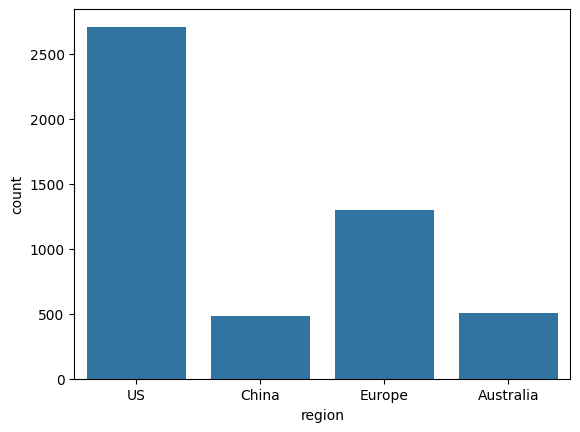

In [ ]:
sns.countplot(data=df_player, x='region')

In [ ]:
df_region_players = pd.pivot_table(df_player, index='region',values='playerid', aggfunc='count')
df_region_players

,playerid
region,
Australia,507
China,485
Europe,1299
US,2709


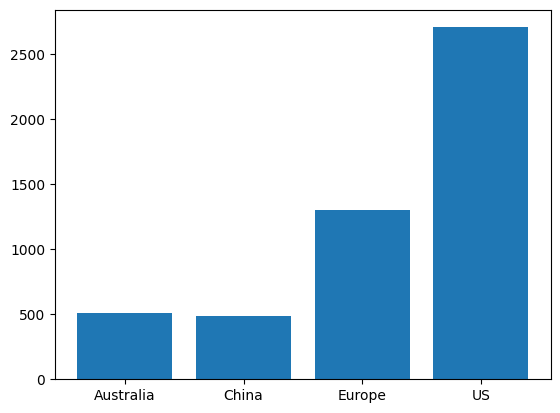

In [ ]:
plt.figure()
plt.bar(df_region_players.index, df_region_players['playerid'])
plt.show()

#### Moneyspent distribution per region

Now we want to analyze how money spent (`moneyspent`) varies across different regions, and visually compare the distributions side by side.

1. Create a boxplot to:

  - Compare the distribution of moneyspent across the different region categories. Use `sns.boxplot(data, y, x, hue)`

  - Use color to differentiate the regions visually (Use `hue=`).  

  - Limit the y-axis to 0–100 for better visibility. (Use `plt.ylim()`).

  - Provide a business interpretation of the result

2. Using a pivot table, calculate the average amount of money spent (`
moneyspent`) by players in each region.

  💡 Hint: Use `pd.pivot_table()` with appropiate values for `index=`, `values=`, and aggfunc to compute the average per region.  

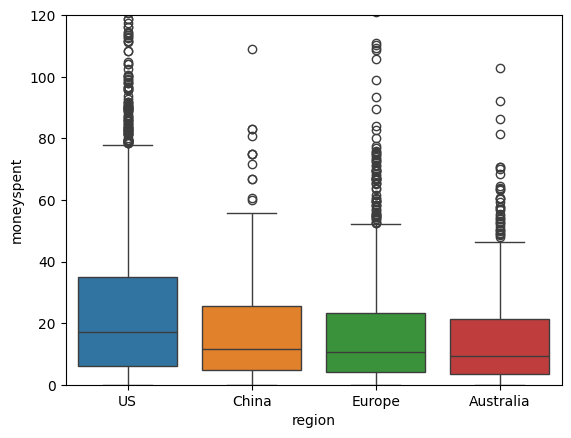

In [ ]:
plt.figure()
sns.boxplot(df_player, y="moneyspent", x="region", hue="region")
plt.ylim(0, 120)
plt.show()

Business interpretation


US players spend more money on average than players in other regions.
This is visible from the higher median line (the thick line inside the box).
The interquartile range (IQR) is also larger, showing more variability.
There are many high-value outliers, suggesting that some players spend significantly more.

In [ ]:
pd.pivot_table(df_player, index='region',values='moneyspent', aggfunc='mean')

,moneyspent
region,
Australia,9.38
China,11.49
Europe,10.51
US,17.26


#### Relationship Between Age and Money Spent

 - (Visually) Use a scatter plot to see if older players tend to spend more money.

 Suggestion Use a random sample of 100 by doing `df_player.sample(100)` store the result in a dataframe called `df_sample`

 - (Analytically). Compute the coefficient of correlation between both variables using whole dataset

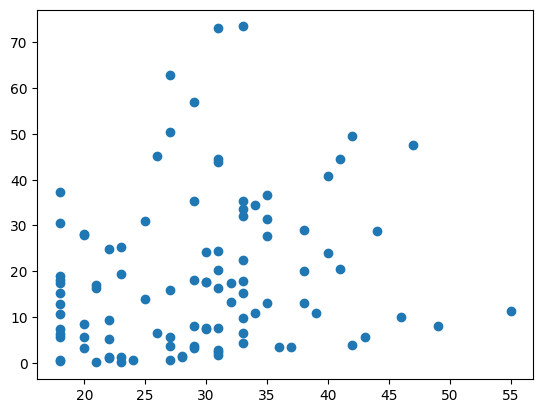

In [ ]:
df_sample = df_player.sample(100)
# Scatter plot
plt.figure()
plt.scatter(df_sample['age'], df_sample['moneyspent'])
plt.show()

In [ ]:
df_player['age'].corr(df_player['moneyspent'])

np.float64(0.31192133588664317)

#### Success rate

Let's add a new column to our dataframe named `success_rate`. Success rate will be defined as:


  $$\text{Success_rate} = \frac{\text{levelscompleted}}{\text{gameroundsplayed}}\times 100 $$

For example, if a player completes 9 levels out of 100 rounds, their success rate is **9%** — meaning they successfully finish a level 9% of the time.

Your task:

- **1. Define success rate column:**

   Create a new column in `df_player` and call it `success_rate` that captures the formula above.

- **2. Plot in a histogram the distribution of the resulting variable `success_rate`**

- **3. Are young players more skilled?**

 To answer that question let's tackle it from two perspectives:
  
  - a) Compute correlation coefficient between variables `age` and `success_rate`.

  - b) Age Segmentation
  
    Create a function called `age_bucket` . That given a certain age it classifies it into 3 buckets such as:

        - `"Young"` → age < 30  
        - `"Adult"` → 30 ≤ age ≤ 50  
        - `"Senior"` → age > 50

      Once the function is ready, use the `apply()` method over `age` column to create a new column called `age_bucket`

          `df_player['age_bucket'] = df_player['age'].apply(age_bucket)`

      Create a box plot using sns.boxplot() to compare the distribution of `success_rate` per `age_bucket`

      Hint: `sns.boxplot(df, y="", x="")`

-  **4. Do players who spend more money perform better?**

  - Compute correlation coefficient between variables `success_rate` and `moneyspent`

- **5. Compute the following key statistics for the `success_rate` variable:**

  - Mean, standard deviation, and variance
  - Median and mode
  - Minimum and maximum values
  - 25th percentile (Q1), 50th percentile (Q2/Median), and 75th percentile (Q3)

  💡 *Hint: Use functions like `.mean()`, `.std()`, `.var()`, `.quantile()`, and `.mode()` to compute each value.*

In [ ]:
# 1
df_player['success_rate'] = df_player['levelscompleted']/df_player['gameroundsplayed']*100
df_player.head()

,playerid,platform,age,daysingame,companygamesplayed,gameroundsplayed,levelscompleted,moneyspent,region,success_rate
0,P00001,iOS,34,104,2,113,92,4.95,US,81.415929
1,P00002,iOS,28,129,3,164,8,0.74,US,4.878049
2,P00003,Amazon,36,56,1,386,1,8.75,China,0.259067
3,P00004,iOS,45,118,0,35,21,154.19,US,60.000000
4,P00005,iOS,27,132,2,104,84,30.74,Europe,80.769231


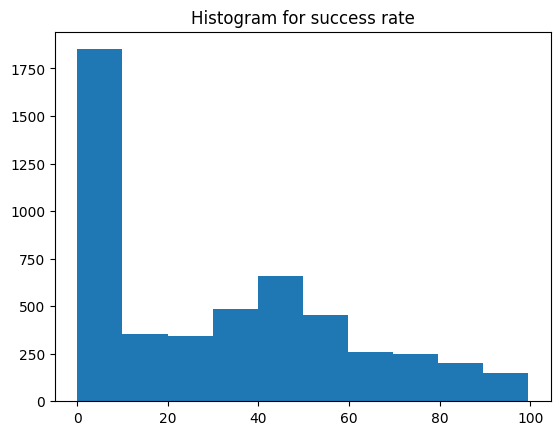

In [ ]:
# 2
plt.figure()
plt.title('Histogram for success rate')
plt.hist(df_player['success_rate'])
plt.show()

In [ ]:
# 2
df_player['success_rate'].corr(df_player['age'])

np.float64(-0.025028397046184037)

In [ ]:
# 3
def age_bucket(age):
  if age <30:
    return 'Young'
  elif age < 50:
    return 'Adult'
  else:
    return 'Senior'

In [ ]:
df_player['age_bucket'] = df_player['age'].apply(age_bucket)
df_player.head()

,playerid,platform,age,daysingame,companygamesplayed,gameroundsplayed,levelscompleted,moneyspent,region,success_rate,age_bucket
0,P00001,iOS,34,104,2,113,92,4.95,US,81.415929,Adult
1,P00002,iOS,28,129,3,164,8,0.74,US,4.878049,Young
2,P00003,Amazon,36,56,1,386,1,8.75,China,0.259067,Adult
3,P00004,iOS,45,118,0,35,21,154.19,US,60.000000,Adult
4,P00005,iOS,27,132,2,104,84,30.74,Europe,80.769231,Young


<Axes: xlabel='age_bucket', ylabel='success_rate'>

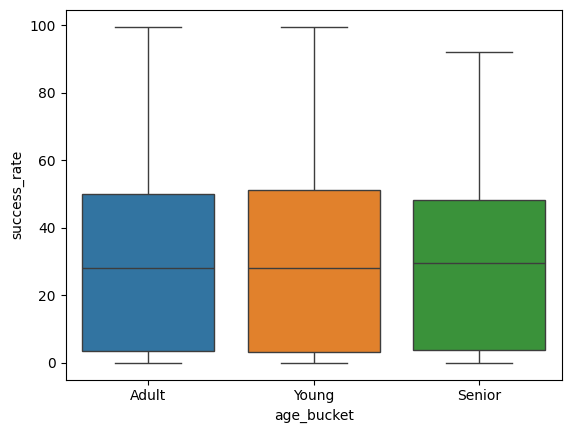

In [ ]:
sns.boxplot(df_player, y="success_rate", x="age_bucket", hue="age_bucket")


In [ ]:
df_player['success_rate'].corr(df_player['moneyspent'])

np.float64(0.19527969648735177)

In [ ]:
# Compute descriptive statistics for success_rate
desc_stats = {
    "Mean": df_player['success_rate'].mean(),
    "Standard Deviation": df_player['success_rate'].std(),
    "Variance": df_player['success_rate'].var(),
    "Median": df_player['success_rate'].median(),
    "Mode": df_player['success_rate'].mode().values,
    "Min": df_player['success_rate'].min(),
    "Max": df_player['success_rate'].max(),
    "25th percentile (Q1)": df_player['success_rate'].quantile(0.25),
    "50th percentile (Q2)": df_player['success_rate'].quantile(0.5),
    "75th percentile (Q3)": df_player['success_rate'].quantile(0.75),
}


---